# US Voting Dataset

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv('datasets/house-votes-84.csv', header=None, nrows=10)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
6,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
9,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?


## Data manipulation

In [7]:
colnames = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

df = pd.read_csv('datasets/house-votes-84.csv',names=colnames, true_values=['y'], false_values=['n','?'])
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,False,True,False,True,True,True,False,False,False,True,False,True,True,True,False,True
1,republican,False,True,False,True,True,True,False,False,False,False,False,True,True,True,False,False
2,democrat,False,True,True,False,True,True,False,False,False,False,True,False,True,True,False,False
3,democrat,False,True,True,False,False,True,False,False,False,False,True,False,True,False,False,True
4,democrat,True,True,True,False,True,True,False,False,False,False,True,False,True,True,True,True


In [8]:
df.iloc[:,1:] = df.iloc[:,1:].astype(int)
df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [9]:
df.to_csv('datasets/house-votes-84_cleaned.csv', index=False)

In [10]:
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.448276,0.581609,0.406897,0.487356,0.625287,0.549425,0.556322,0.475862,0.496552,0.344828,0.393103,0.480460,0.570115,0.400000,0.618391
std,0.495630,0.497890,0.493863,0.491821,0.500416,0.484606,0.498124,0.497390,0.499992,0.500564,0.475859,0.489002,0.500193,0.495630,0.490462,0.486341
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## EDA

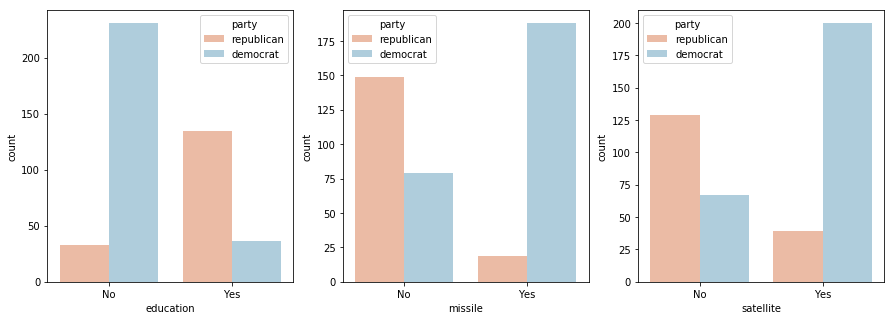

In [38]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(131)
sns.countplot(data=df, x='education', hue='party', palette='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.subplot(132)
sns.countplot(data=df, x='missile', hue='party', palette='RdBu')
plt.xticks([0,1],['No','Yes'])
plt.subplot(133)
sns.countplot(data=df, x='satellite', hue='party', palette='RdBu')
plt.xticks([0,1],['No','Yes']);

It seems like Democrats voted resoundingly against the education bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples!

# k-Nearest Neighbors
## Fitting
Fitting a k-Nearest Neighbors classifier to the voting dataset to predict party

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
# Create an array for the features, dropping the target
X = df.drop('party', axis=1).values

# Create an array for response variable
y = df['party'].values

# instantate a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

## Predict

In [18]:
# Predict the labels for the traning data X
y_pred = knn.predict(X)

In [20]:
# Predict the label for the new data point X_new

X_new = np.array([[ 0.88642468,  0.14977894,  0.04606584,  0.43664685,  0.04386618,
         0.50052392,  0.7865542 ,  0.28088996,  0.27519292,  0.7983003 ,
         0.63788995,  0.45859962,  0.96972264,  0.92738537,  0.33248457,
         0.45106006]])
new_prediction = knn.predict(X_new)
print('Prediction: {}'.format(new_prediction))

Prediction: ['democrat']
